# Import  All important libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load dataset

In [2]:
df= pd.read_csv("loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


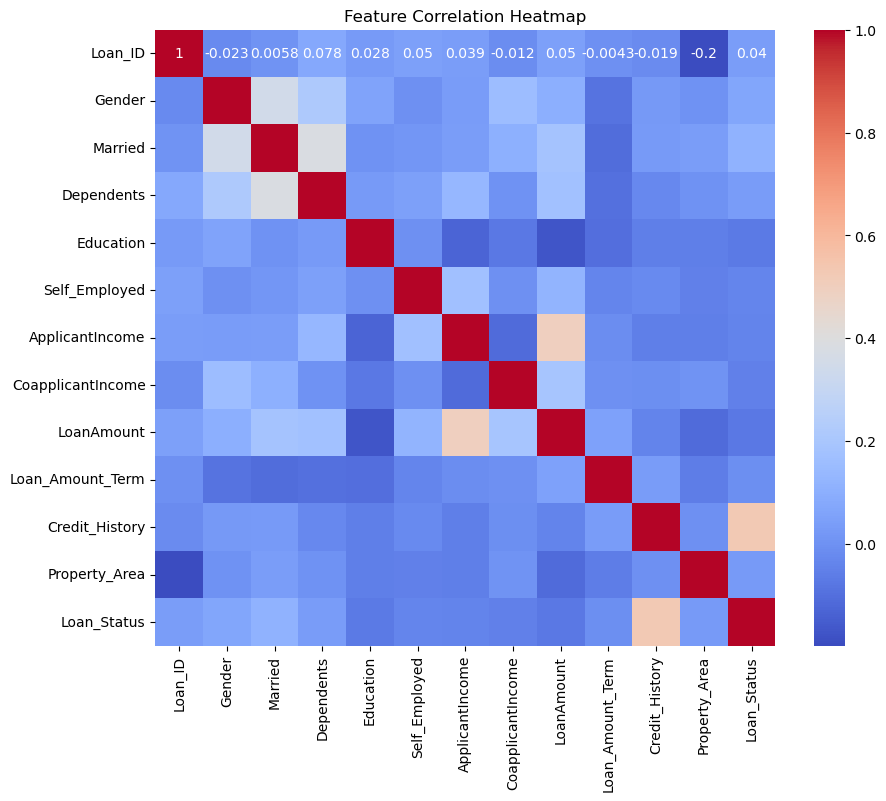

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Check missing values in numeric and categorical columns

In [5]:
df_num = df.select_dtypes(include=['int64','float64'])

In [6]:
df_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [7]:
df_cat = df.select_dtypes(include=['O'])
df_cat.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

# Drop rows with missing values

In [8]:
df= df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding for categorical columns

In [10]:
le = LabelEncoder()
for col in df.select_dtypes(include=['O']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [11]:
print(le.classes_)

['N' 'Y']


In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1



# Fix the 'Dependents' column values ('3+' -> 4)

In [13]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [14]:
df = df.replace(to_replace='3+',value=4)

In [15]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

# Define features and target variable

In [16]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']


# Split data into train and test sets

In [17]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

# Train Support Vector Classifier

In [18]:
model2 = SVC(kernel='linear', C=1.0, gamma='scale')  # Try also 'linear' or 'poly'
model2.fit(X_train, y_train)
y_pred_svc = model2.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc) * 100
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 85.41666666666666


# Train Decision Tree Classifier

In [19]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [20]:
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)*100}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier:
Accuracy: 75.0
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.78      0.88      0.83        33

    accuracy                           0.75        48
   macro avg       0.71      0.67      0.68        48
weighted avg       0.74      0.75      0.74        48

Confusion Matrix:
 [[ 7  8]
 [ 4 29]]


# Comparison table

In [21]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted':y_pred_svc
})
comparison_df.head(10) 

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


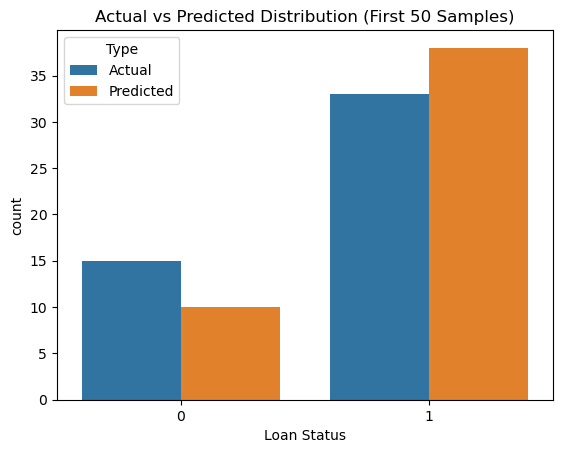

In [22]:
comparison_melted = pd.melt(comparison_df.head(50), var_name='Type', value_name='Loan Status')

sns.countplot(data=comparison_melted, x='Loan Status', hue='Type')
plt.title('Actual vs Predicted Distribution (First 50 Samples)')
plt.show()